In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Dataset
data = pd.read_csv('netflix1.csv')

In [ ]:
# Basic Exploration
print(data.head())
print(data.info())


  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [ ]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Check Content Distribution
content_counts = data['type'].value_counts()
print("\nContent Type Counts:\n", content_counts)


Content Type Counts:
 type
Movie      6126
TV Show    2664
Name: count, dtype: int64


Text(0.5, 1.0, 'Count of Movies vs TV Shows')

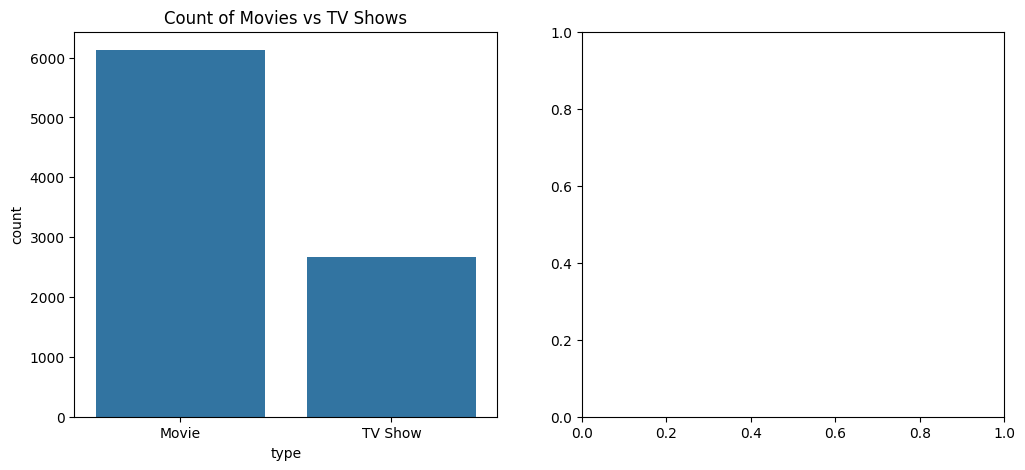

In [ ]:
# Visualize Content Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='type', data=data, ax=axes[0])
axes[0].set_title('Count of Movies vs TV Shows')

In [ ]:
axes[1].pie(content_counts, labels=content_counts.index, autopct='%.0f%%', startangle=90)
axes[1].set_title('Movies vs TV Shows (Percentage)')


Text(0.5, 1.0, 'Movies vs TV Shows (Percentage)')

In [ ]:
plt.suptitle('Netflix Content Distribution')
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
# Clean date_added
data['date_added'] = pd.to_datetime(data['date_added'])


In [ ]:
# Visualize Rating Frequency
rating_counts = data['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

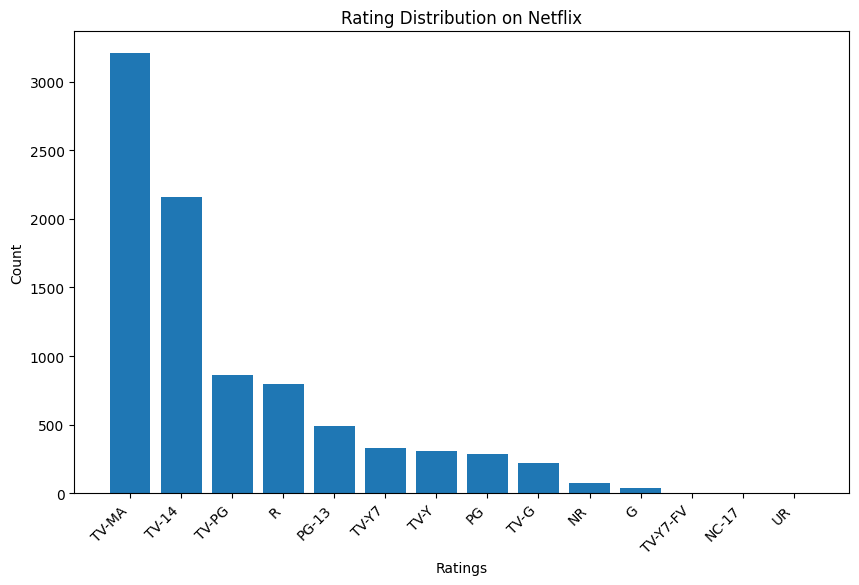

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(rating_counts['rating'], rating_counts['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title('Rating Distribution on Netflix')
plt.show()

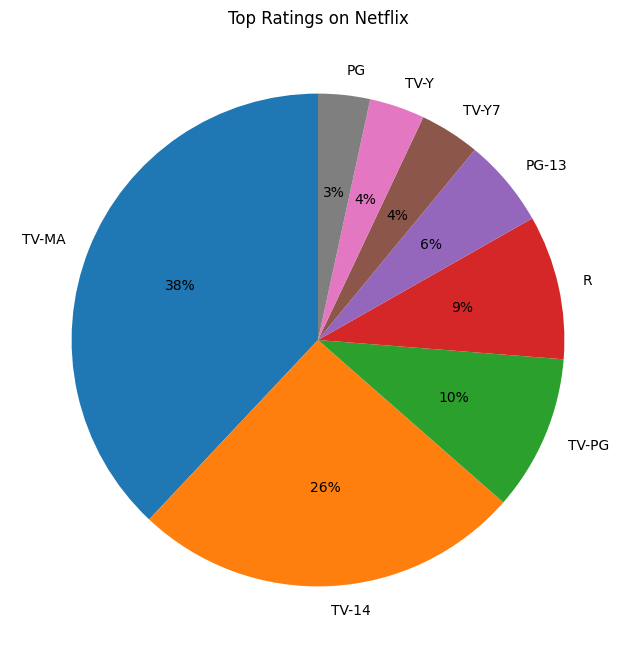

In [ ]:
# Pie chart for top ratings
plt.figure(figsize=(8, 8))
plt.pie(rating_counts['count'][:8], labels=rating_counts['rating'][:8], autopct='%.0f%%', startangle=90)
plt.title('Top Ratings on Netflix')
plt.show()

In [ ]:
# Top 10 Countries with Most Content
top_countries = data['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'count']


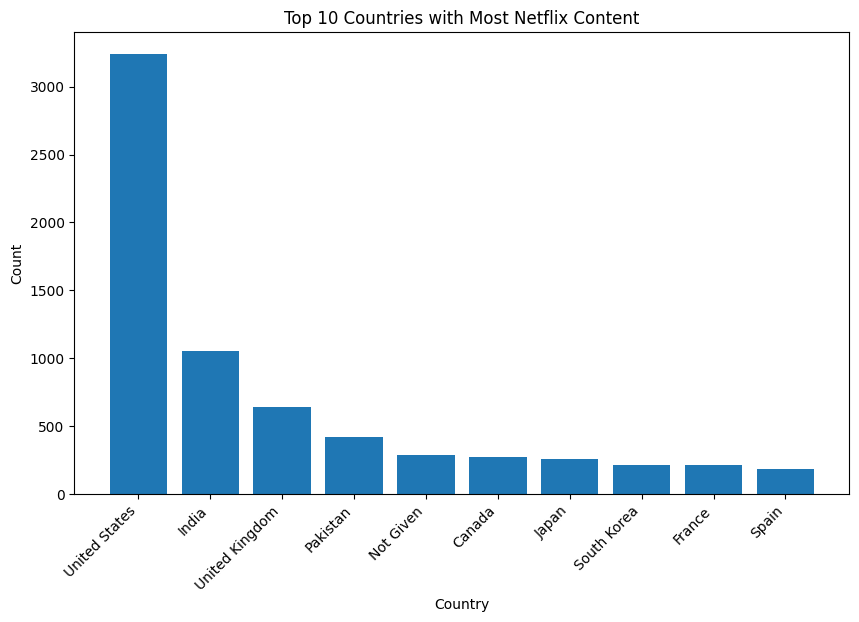

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Count")
plt.title('Top 10 Countries with Most Netflix Content')
plt.show()


In [ ]:
# Extract Year, Month, Day
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [ ]:
# Monthly Releases
monthly_movies = data[data['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_shows = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()

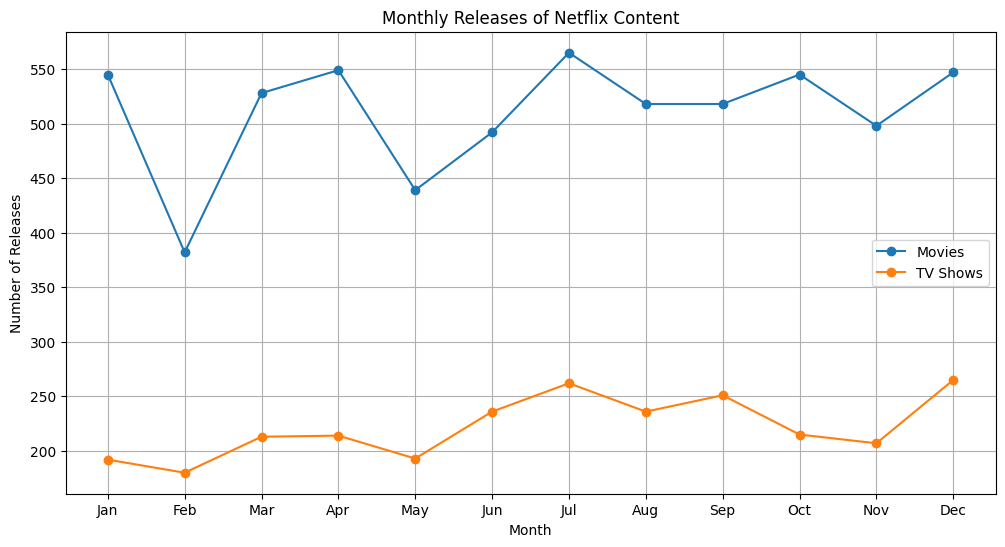

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_movies.index, monthly_movies.values, label='Movies', marker='o')
plt.plot(monthly_shows.index, monthly_shows.values, label='TV Shows', marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Releases of Netflix Content')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Yearly Releases
yearly_movies = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_shows = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()


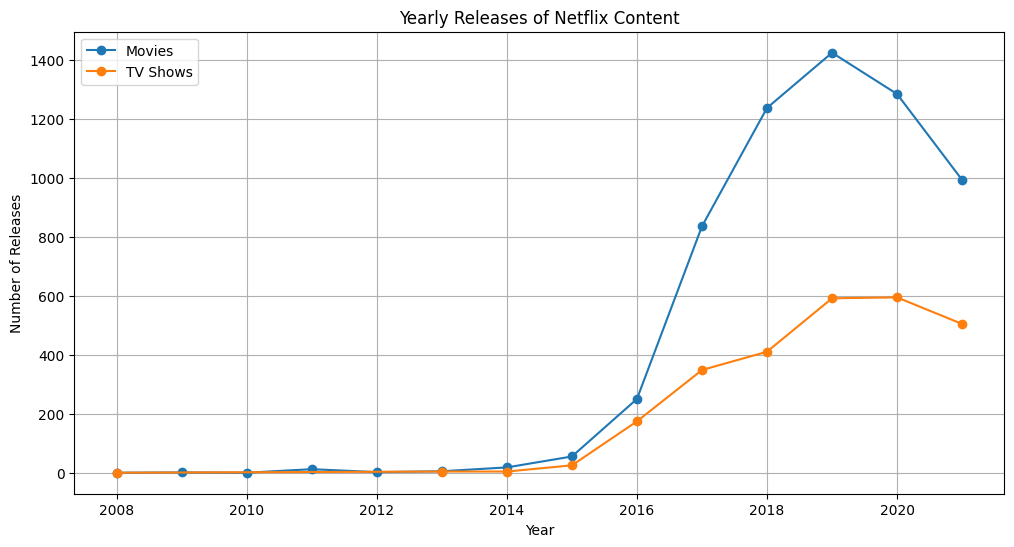

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_movies.index, yearly_movies.values, label='Movies', marker='o')
plt.plot(yearly_shows.index, yearly_shows.values, label='TV Shows', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Yearly Releases of Netflix Content')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Top Movie Genres
top_movie_genres = data[data['type'] == 'Movie']['listed_in'].value_counts().head(10)

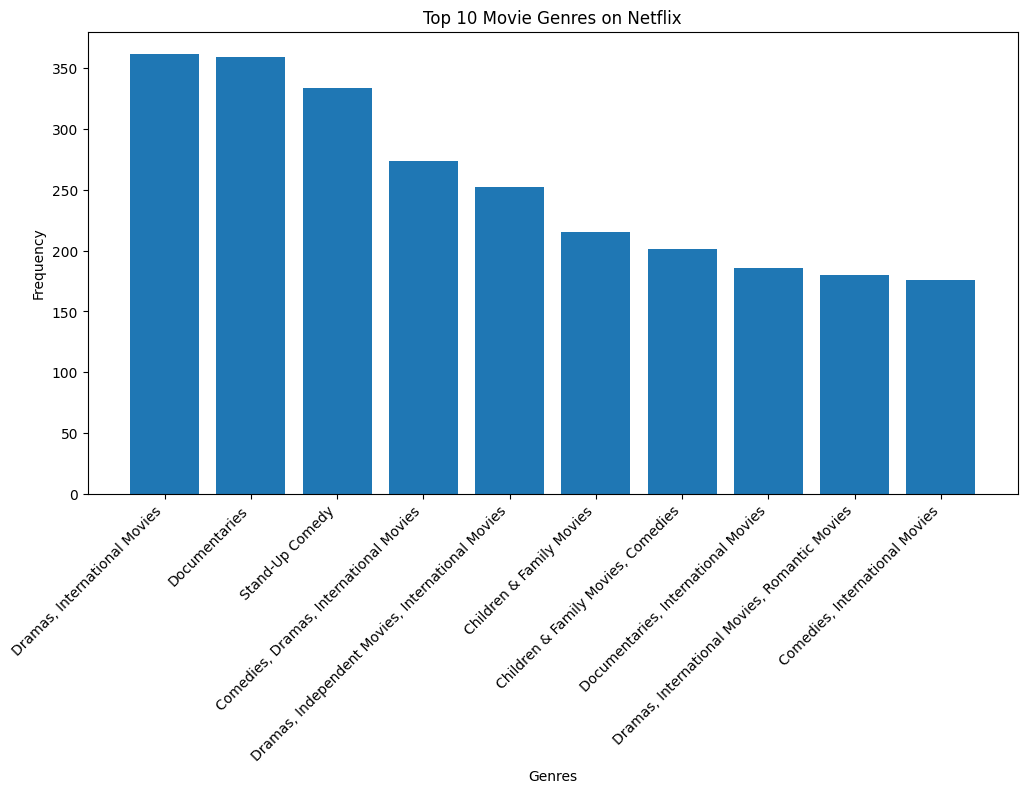

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_movie_genres.index, top_movie_genres.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Movie Genres on Netflix')
plt.show()


In [ ]:
# Top TV Show Genres
top_show_genres = data[data['type'] == 'TV Show']['listed_in'].value_counts().head(10)

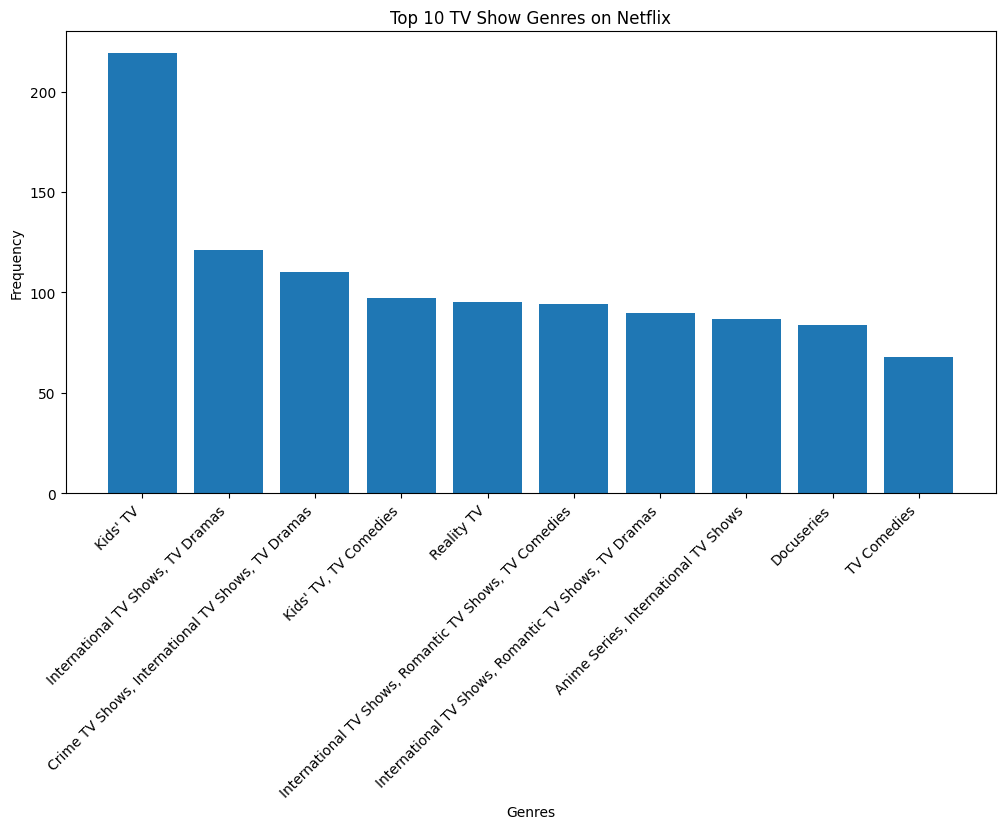

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_show_genres.index, top_show_genres.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 TV Show Genres on Netflix')
plt.show()

In [ ]:
# Top 15 Directors
top_directors = data['director'].value_counts().head(15).reset_index()
top_directors.columns = ['director', 'count']


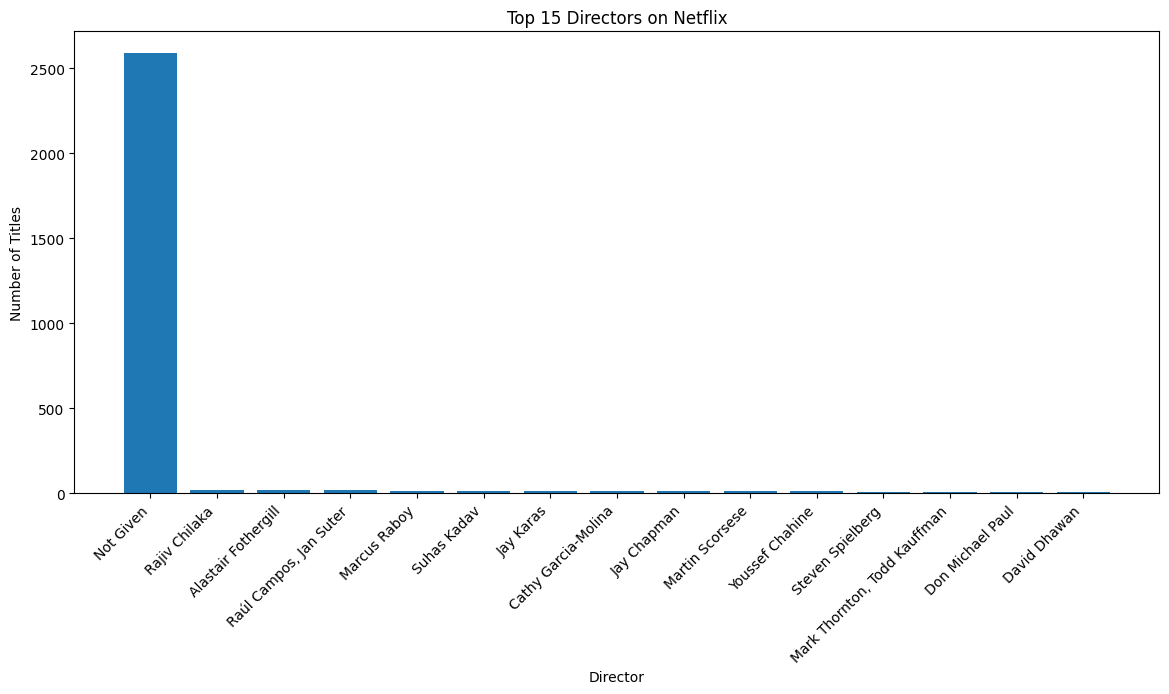

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(top_directors['director'], top_directors['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 15 Directors on Netflix')
plt.show()